In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm

# Logistic Regression model
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import sklearn
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

In [2]:
# # ROWS (all, or only some of them)
# pd.set_option('display.max_rows', None) # Showing all rows.
# pd.reset_option('display.max_rows') # Showing only some rows. 

**Begin the Modeling here**
- Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.
- Concatenate numerical and categorical back together again for your X dataframe.  Designate the TargetB as y.
  - Split the data into a training set and a test set.
  - Split further into train_num and train_cat.  Also test_num and test_cat.
  - Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)
  - Encode the categorical features using One-Hot Encoding or Ordinal Encoding.  (train_cat, test_cat)
      - **fit** only on train data, transform both train and test
      - again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test
  - Fit a logistic regression (classification) model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model has changed.

#### Importing data

In [3]:
numerical = pd.read_csv('numerical.csv')
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [4]:
targets = pd.read_csv('target.csv')
targets.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [5]:
categorical = pd.read_csv('categorical.csv')
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


#### Checking dtypes

In [6]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [7]:
categorical["DATASRCE"].value_counts()
# This feature should be expressed as object. 
# It should be converted to object.

DATASRCE
3    64829
2    23455
1     7128
Name: count, dtype: int64

In [8]:
categorical["DATASRCE"] = categorical["DATASRCE"].astype(str)

In [9]:
categorical["DOB_YR"].value_counts()
# These features are expressed as integers. The birt_date, so age could have also a meaning here. Bigger age could mean, that someone can make bigger donation.
# All features connected to date I will keep as numbers (int or float), to avoid onehotencoding later one (these will create too many features)


DOB_YR
0     23661
20     1942
30     1923
48     1912
50     1890
      ...  
7         1
89        1
9         1
85        1
83        1
Name: count, Length: 96, dtype: int64

In [10]:
pd.set_option('display.max_rows', None) # Showing all rows.
numerical.dtypes

TCODE         int64
AGE         float64
INCOME        int64
WEALTH1       int64
HIT           int64
MALEMILI      int64
MALEVET       int64
VIETVETS      int64
WWIIVETS      int64
LOCALGOV      int64
STATEGOV      int64
FEDGOV        int64
WEALTH2       int64
POP901        int64
POP902        int64
POP903        int64
POP90C1       int64
POP90C2       int64
POP90C3       int64
POP90C4       int64
POP90C5       int64
ETH1          int64
ETH2          int64
ETH3          int64
ETH4          int64
ETH5          int64
ETH6          int64
ETH7          int64
ETH8          int64
ETH9          int64
ETH10         int64
ETH11         int64
ETH12         int64
ETH13         int64
ETH14         int64
ETH15         int64
ETH16         int64
AGE901        int64
AGE902        int64
AGE903        int64
AGE904        int64
AGE905        int64
AGE906        int64
AGE907        int64
CHIL1         int64
CHIL2         int64
CHIL3         int64
AGEC1         int64
AGEC2         int64
AGEC3         int64


In [11]:
pd.reset_option('display.max_rows') # Showing only some rows. 

In [12]:
# All features in numerical are integer or float.
# Even they are categorical, but have dtype integer or float, I will not convert dtype, as this will create too much additional features for the future model.

In [13]:
numerical.columns[numerical.dtypes == object]

Index([], dtype='object')

In [14]:
# All numerical columns are numerical (no column has dtype object)
# WEALTH 
# INCOME should be consideres as a categorical value, because there are only very few values here

# are actually interpreted as categorical features. although having dtype as integer. 
# But I decide not to change the dtype, becasue this way we would have need 

In [15]:
numerical["INCOME"].value_counts()

INCOME
5    36737
2    13114
4    12732
1     9022
3     8558
6     7778
7     7471
Name: count, dtype: int64

In [16]:
numerical["WEALTH1"].value_counts()

WEALTH1
9    52317
8     6793
7     6198
6     5825
5     5280
4     4810
3     4237
2     4085
1     3454
0     2413
Name: count, dtype: int64

In [17]:
numerical.columns

Index(['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET',
       'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
       'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT',
       'CONTROLN', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=315)

In [18]:
categorical["DOMAIN_B"].value_counts()

DOMAIN_B
2    48356
1    28498
3    16754
4     1804
Name: count, dtype: int64

In [19]:
categorical['DOMAIN_B'].replace({1: 4, 2: 3, 3: 2, 4: 1}, inplace=True)

In [20]:
categorical["DOMAIN_B"].value_counts()

DOMAIN_B
3    48356
4    28498
2    16754
1     1804
Name: count, dtype: int64

In [21]:
# Checking potential features, which are not numerical, but actually could be categorical

# numer_values =[]
# for i in numerical.columns:
#     unique_values = numerical[i].nunique()
#     if unique_values <=10: 
#         numer_values.append(i)

# numer_values

# this above code check the number of unique values of each 
# numerical columns and when the unique values are less than or equal to 10 , we will convert it into category

In [22]:
# Those columns should be treated as categorical data, not numerical.
# data type of those features should be converted to object 

In [23]:
# numerical["INCOME"] = numerical["INCOME"].astype(str)
# numerical["WEALTH1"] = numerical["WEALTH1"].astype(str)
# numerical["WEALTH2"] = numerical["WEALTH2"].astype(str)
# numerical["MHUC2"] = numerical["MHUC2"].astype(str)
# numerical["HPHONE_D"] = numerical["HPHONE_D"].astype(str)
# numerical["RFA_2F"] = numerical["RFA_2F"].astype(str)

In [24]:
# numerical.columns[numerical.dtypes == object]

#### Concatenate numerical and categorical back together again for your X dataframe. Designate the TargetB as y

In [25]:
X = pd.concat((numerical,categorical),axis=1)

In [26]:
X.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.000000,5,9,0,0,39,34,18,10,...,37,12,92,8,94,2,95,12,89,11
1,1,46.000000,6,9,16,0,15,55,11,6,...,52,2,93,10,95,12,95,12,93,10
2,1,61.611649,3,1,2,0,20,29,33,6,...,0,2,91,11,92,7,95,12,90,1
3,0,70.000000,1,4,2,0,23,14,31,3,...,28,1,87,11,94,11,95,12,87,2
4,0,78.000000,3,2,60,1,28,9,53,26,...,20,1,93,10,96,1,96,1,79,3


In [27]:
X.shape

(95412, 337)

In [28]:
y = targets.drop(columns=['TARGET_D'])

In [29]:
y.head()

,TARGET_B
0,0
1,0
2,0
3,0
4,0


#### Split the data into a training set and a test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [31]:
X_train.shape

(76329, 337)

#### Split further into train_num and train_cat. Also test_num and test_cat.

In [32]:
# numerical/categorical on train set
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

# numerical/categorical on test set
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [33]:
display(X_train_num.shape)
display(X_train_cat.shape)

(76329, 329)

(76329, 8)

#### Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)

In [34]:
# MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)

In [35]:
X_train_normalized = transformer.transform(X_train_num)
df_X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
df_X_train_normalized.head()
df_X_train_normalized.shape

(76329, 329)

In [36]:
X_test_normalized = transformer.transform(X_test_num)
df_X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
df_X_test_normalized.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0.000483,0.659794,0.833333,1.000000,0.000000,0.000000,0.242424,0.424242,0.222222,0.090909,...,0.329897,0.636364,0.727273,0.818182,0.909091,0.909091,0.0,0.909091,0.947917,0.727273
1,0.000017,0.587629,0.666667,1.000000,0.000000,0.000000,0.171717,0.282828,0.424242,0.101010,...,0.412371,0.363636,0.681818,0.636364,0.909091,0.000000,0.0,0.272727,0.906250,0.272727
2,0.000017,0.463918,1.000000,0.888889,0.004149,0.000000,0.282828,0.444444,0.222222,0.020202,...,0.536082,0.181818,0.727273,0.818182,0.909091,0.818182,0.0,0.818182,0.947917,0.818182
3,0.000000,0.624862,0.666667,1.000000,0.000000,0.000000,0.333333,0.373737,0.494949,0.080808,...,0.000000,0.090909,0.727273,0.090909,0.636364,0.090909,0.5,0.090909,0.895833,0.909091
4,0.000000,0.463918,0.333333,0.222222,0.000000,0.494949,0.161616,0.323232,0.030303,0.090909,...,0.536082,0.000000,0.954545,0.090909,0.954545,0.090909,0.5,0.090909,1.000000,0.090909


#### Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)

In [37]:
X_train_cat

,STATE,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
79401,other,H,M,3,L,D,B,C
86429,other,H,F,2,L,F,C,R
76729,FL,H,M,3,L,E,A,C
38838,CA,H,M,3,L,F,A,U
83012,other,U,F,3,L,F,B,C
...,...,...,...,...,...,...,...,...
21243,WI,H,F,3,L,E,B,S
45891,GA,U,F,3,L,F,D,T
42613,other,H,M,3,L,D,D,R
43567,FL,H,M,3,L,G,C,T


In [38]:
X_train_cat["RFA_2R"].unique()

# This feature should be dropped from train and test

array(['L'], dtype=object)

In [39]:
X_train_cat = X_train_cat.drop(["RFA_2R"], axis=1)
X_test_cat = X_test_cat.drop(["RFA_2R"], axis=1)

In [40]:
X_train_cat.shape

(76329, 7)

In [41]:
X_test_cat.shape

(19083, 7)

In [42]:
# OneHot Encoding

In [43]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

In [44]:
# Getting names of columns to be able to label features
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

In [45]:
# Running encoder on a X_train_cat
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
df_X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=cols)
df_X_train_cat_encoded.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Running encoder on a X_test_cat
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
df_X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=cols)
df_X_test_cat_encoded.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test

In [47]:
X_train_transformed = pd.concat([df_X_train_normalized, df_X_train_cat_encoded], axis=1) 

X_train_transformed.head()
X_train_transformed.shape

(76329, 355)

In [48]:
X_test_transformed = pd.concat([df_X_test_normalized, df_X_test_cat_encoded], axis=1)
X_test_transformed.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000483,0.659794,0.833333,1.000000,0.000000,0.000000,0.242424,0.424242,0.222222,0.090909,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000017,0.587629,0.666667,1.000000,0.000000,0.000000,0.171717,0.282828,0.424242,0.101010,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000017,0.463918,1.000000,0.888889,0.004149,0.000000,0.282828,0.444444,0.222222,0.020202,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.624862,0.666667,1.000000,0.000000,0.000000,0.333333,0.373737,0.494949,0.080808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.463918,0.333333,0.222222,0.000000,0.494949,0.161616,0.323232,0.030303,0.090909,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
X_test_transformed.shape

(19083, 355)

#### Fit a logistic regression (classification) model on the training data

In [50]:
# Creating a Logistic model
LR = LogisticRegression(random_state=0, solver='lbfgs')

In [51]:
LR.fit(X_train_transformed, y_train)

C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

#### Check the accuracy on the test data.

In [52]:
pred = LR.predict(X_test_transformed)

In [53]:
LR.score(X_test_transformed, y_test) # accuracy

0.9475973379447676

In [54]:
print("precision: ",precision_score(y_test,pred))  # Not that important
print("recall: ",recall_score(y_test,pred))  # Should be possibly high
print("f1: ",f1_score(y_test,pred))

precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[18083,     0],
       [ 1000,     0]], dtype=int64)

### Managing imbalance in the dataset

#### Check for the imbalance.

In [56]:
targets['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [57]:
# we see the TARGET_B is very imbalanced

### Resampling

#### Downsampling

In [58]:
X_train_transformed.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000017,0.762887,0.500000,0.666667,0.008299,0.000000,0.313131,0.101010,0.686869,0.060606,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.536082,0.666667,1.000000,0.000000,0.000000,0.292929,0.242424,0.383838,0.070707,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.000017,0.608247,0.666667,0.111111,0.020747,0.000000,0.424242,0.161616,0.626263,0.101010,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000017,0.783505,0.833333,0.666667,0.037344,0.010101,0.404040,0.232323,0.414141,0.080808,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000052,0.556701,0.666667,0.222222,0.087137,0.333333,0.272727,0.292929,0.181818,0.121212,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
y_train = y_train.reset_index(drop=True)

In [60]:
y_train

,TARGET_B
0,0
1,0
2,1
3,0
4,0
...,...
76324,0
76325,0
76326,1
76327,0


In [61]:
data_b = pd.concat([X_train_transformed, y_train], axis=1)
data_b

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.000017,0.762887,0.500000,0.666667,0.008299,0.000000,0.313131,0.101010,0.686869,0.060606,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.536082,0.666667,1.000000,0.000000,0.000000,0.292929,0.242424,0.383838,0.070707,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,0.000017,0.608247,0.666667,0.111111,0.020747,0.000000,0.424242,0.161616,0.626263,0.101010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000017,0.783505,0.833333,0.666667,0.037344,0.010101,0.404040,0.232323,0.414141,0.080808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.000052,0.556701,0.666667,0.222222,0.087137,0.333333,0.272727,0.292929,0.181818,0.121212,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.000000,0.711340,0.333333,1.000000,0.020747,0.020202,0.373737,0.101010,0.323232,0.262626,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
76325,0.000034,0.670103,0.333333,0.666667,0.000000,0.000000,0.363636,0.111111,0.626263,0.040404,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
76326,0.000017,0.624862,0.666667,1.000000,0.000000,0.000000,0.353535,0.292929,0.424242,0.171717,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
76327,0.000017,0.773196,0.666667,0.333333,0.004149,0.000000,0.595960,0.222222,0.313131,0.030303,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [62]:
category_0 = data_b[data_b['TARGET_B'] == 0]
category_1 = data_b[data_b['TARGET_B'] == 1]

In [63]:
category_0_undersampled = resample(category_0,
                                   replace=False,                    # replace=False means all rows will be unique
                                   n_samples = len(category_1))      # how many we need, so the same as category_1

In [64]:
print(category_0_undersampled.shape)
print(category_1.shape)

(3843, 356)
(3843, 356)


In [65]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [66]:
data_downsampled['TARGET_B'].value_counts()

TARGET_B
0    3843
1    3843
Name: count, dtype: int64

In [67]:
X_d = data_downsampled.drop(['TARGET_B'], axis=1)
y_d = data_downsampled['TARGET_B']

In [68]:
X_d.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
50889,0.000034,0.762887,0.500000,1.000000,0.012448,0.040404,0.525253,0.232323,0.303030,0.131313,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5433,0.000034,0.624862,0.500000,0.444444,0.000000,0.000000,0.343434,0.555556,0.252525,0.050505,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15418,0.000017,0.577320,0.166667,1.000000,0.000000,0.000000,0.363636,0.181818,0.515152,0.050505,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
23933,0.000017,0.624862,0.000000,1.000000,0.000000,0.000000,0.262626,0.383838,0.232323,0.050505,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
42939,0.000483,0.814433,0.666667,0.777778,0.062241,0.000000,0.343434,0.434343,0.343434,0.080808,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_d.shape

(7686, 355)

In [70]:
y_d

50889    0
5433     0
15418    0
23933    0
42939    0
        ..
76261    1
76276    1
76300    1
76301    1
76326    1
Name: TARGET_B, Length: 7686, dtype: int64

In [71]:
# Creating a Logistic model for downs
LR_d = LogisticRegression(random_state=0, solver='lbfgs')

In [72]:
LR_d.fit(X_d, y_d)

C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [73]:
pred_d = LR_d.predict(X_test_transformed)

In [74]:
LR_d.score(X_test_transformed, y_test) # accuracy

0.5873290363150449

In [75]:
print("precision: ",precision_score(y_test,pred_d))  # Not that important
print("recall: ",recall_score(y_test,pred_d))  # Should be possibly high
print("f1: ",f1_score(y_test,pred_d))

precision:  0.07015130674002751
recall:  0.561
f1:  0.12470823607869289


In [76]:
confusion_matrix(y_test, pred_d)

array([[10647,  7436],
       [  439,   561]], dtype=int64)

#### Upscalling

In [77]:
category_1_oversampled = resample(category_1,
                                  replace=True,                 # replace=True means rows will not be unique
                                  n_samples = len(category_0))

In [78]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72486, 356)
(72486, 356)


In [79]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [80]:
data_upsampled['TARGET_B'].value_counts()

TARGET_B
0    72486
1    72486
Name: count, dtype: int64

In [81]:
data_upsampled = data_upsampled.reset_index(drop=True)

data_upsampled

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.000017,0.762887,0.500000,0.666667,0.008299,0.000000,0.313131,0.101010,0.686869,0.060606,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.536082,0.666667,1.000000,0.000000,0.000000,0.292929,0.242424,0.383838,0.070707,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,0.000017,0.783505,0.833333,0.666667,0.037344,0.010101,0.404040,0.232323,0.414141,0.080808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.000052,0.556701,0.666667,0.222222,0.087137,0.333333,0.272727,0.292929,0.181818,0.121212,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.824742,0.500000,1.000000,0.000000,0.000000,0.484848,0.111111,0.525253,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144967,0.000017,0.624862,0.166667,1.000000,0.000000,0.000000,0.303030,0.373737,0.141414,0.010101,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
144968,0.000017,0.577320,0.666667,1.000000,0.000000,0.000000,0.191919,0.424242,0.353535,0.111111,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
144969,0.000017,0.391753,0.666667,0.888889,0.008299,0.010101,0.282828,0.363636,0.000000,0.050505,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
144970,0.000017,0.731959,0.500000,1.000000,0.000000,0.434343,0.343434,0.585859,0.121212,0.030303,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# Lab-random-forests

### Instructions
1. Apply the Random Forests algorithm AFTER upscaling the data to deal with the imbalance.
2. Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
3. Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.
4. Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### 1.

In [83]:
# trainset
trainset = data_upsampled

In [84]:
trainset.head()
trainset.shape

(144972, 356)

In [85]:
# X-y Split
X_train_treated_upsampled = trainset.drop(['TARGET_B'], axis=1)
y_train = trainset['TARGET_B']

print(X_train_treated_upsampled.shape)

(144972, 355)


In [86]:
# Renaming the train set
X_train = X_train_treated_upsampled

In [87]:
X_test_transformed

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000483,0.659794,0.833333,1.000000,0.000000,0.000000,0.242424,0.424242,0.222222,0.090909,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000017,0.587629,0.666667,1.000000,0.000000,0.000000,0.171717,0.282828,0.424242,0.101010,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000017,0.463918,1.000000,0.888889,0.004149,0.000000,0.282828,0.444444,0.222222,0.020202,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.624862,0.666667,1.000000,0.000000,0.000000,0.333333,0.373737,0.494949,0.080808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.463918,0.333333,0.222222,0.000000,0.494949,0.161616,0.323232,0.030303,0.090909,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000034,0.624862,0.166667,0.000000,0.000000,0.000000,0.313131,0.262626,0.313131,0.060606,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19079,0.000000,0.690722,0.666667,0.222222,0.074689,0.000000,0.303030,0.232323,0.313131,0.070707,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19080,0.000000,0.505155,0.666667,1.000000,0.000000,0.000000,0.222222,0.121212,0.383838,0.080808,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19081,0.000000,0.624862,0.166667,0.222222,0.000000,0.000000,0.333333,0.262626,0.414141,0.121212,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
X_test = X_test_transformed

In [89]:
y_test.reset_index(drop=True, inplace=True)

In [90]:
y_test

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
19078,0
19079,0
19080,0
19081,0


In [91]:
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree (80%)
                             random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))



0.6207612504483624
0.6032594455798355


In [92]:
y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

TARGET_B
0           18083
1            1000
Name: count, dtype: int64

array([[10970,  7113],
       [  458,   542]], dtype=int64)

In [93]:
#  ---True negative  | False Positive ----
#  ---------------------------------------
#  ---False Negative | True Positive -----

In [96]:
clf = RandomForestClassifier(max_depth=9, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree (80%)
                             random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7875244874872389
0.7205366032594456


In [97]:
y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

TARGET_B
0           18083
1            1000
Name: count, dtype: int64

array([[13358,  4725],
       [  608,   392]], dtype=int64)

In [98]:
clf = RandomForestClassifier(max_depth=10, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree (80%)
                             random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.847536075931904
0.7645024367237856


In [99]:
# Conclusion model clf will perform better with max_depth=10

### 2. Feature Selections

#### Methods for Feature Selection

Combination of:
- looking at correlation between features and target: keep ft with high cor
- looking at low variance columns: eliminate columns with var below treshold
- Kbest or RFE: look at best/worst features, use suggestions but check for multicolinearity

OR
- PCA: create new features

In [100]:
data_upsampled

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.000017,0.762887,0.500000,0.666667,0.008299,0.000000,0.313131,0.101010,0.686869,0.060606,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.536082,0.666667,1.000000,0.000000,0.000000,0.292929,0.242424,0.383838,0.070707,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,0.000017,0.783505,0.833333,0.666667,0.037344,0.010101,0.404040,0.232323,0.414141,0.080808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.000052,0.556701,0.666667,0.222222,0.087137,0.333333,0.272727,0.292929,0.181818,0.121212,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.824742,0.500000,1.000000,0.000000,0.000000,0.484848,0.111111,0.525253,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144967,0.000017,0.624862,0.166667,1.000000,0.000000,0.000000,0.303030,0.373737,0.141414,0.010101,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
144968,0.000017,0.577320,0.666667,1.000000,0.000000,0.000000,0.191919,0.424242,0.353535,0.111111,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
144969,0.000017,0.391753,0.666667,0.888889,0.008299,0.010101,0.282828,0.363636,0.000000,0.050505,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
144970,0.000017,0.731959,0.500000,1.000000,0.000000,0.434343,0.343434,0.585859,0.121212,0.030303,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


#### Variance Treshold

In [101]:
data_upsampled

X_train_new = data_upsampled.drop(['TARGET_B'], axis=1)
y_train_new = data_upsampled['TARGET_B']

In [102]:
# removing features with low-variance.
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))   # sel is transformer

In [103]:
# This drops the columns that have a variance less than this threshold
sel = sel.fit(X_train_new)    # fitting transformer
# temp = sel.transform(numerical_scaled)   # "temp" name of the variable transformation is made on array
# temp = pd.DataFrame(temp)   # then we make a df from array
# or two last lines is one step: 
temp = pd.DataFrame(sel.transform(X_train_new))



In [104]:
print(X_train_new.shape)
print(temp.shape)

# Here features will be optimised from 355 to 114. But this is still a big number, so I will try with a different method. 

(144972, 355)
(144972, 113)


- Here I am still getting too many features, so I decide to check another way to reduce the features number. 

##### KBest (choosing the best features) 

In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

In [106]:
data_upsampled

X_train_new = data_upsampled.drop(['TARGET_B'], axis=1)
y_train_new = data_upsampled['TARGET_B']

In [107]:
# Here I choose 25 features, which I will in the next step analyse (lke checking the correlation)

kbest = SelectKBest(chi2, k=25).fit_transform(X_train_new, y_train_new)
selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.212121,0.105167,0.107333,0.162791,0.141414,0.000000,0.010101,0.040404,0.232323,0.000000,...,0.195122,0.666667,0.214286,0.000000,0.5,0.0,0.0,0.0,0.0,0.0
1,0.161616,0.042833,0.052667,0.093023,0.080808,0.000000,0.010101,0.020202,0.040404,0.000000,...,0.024390,0.000000,0.928571,0.000000,0.5,0.0,0.0,0.0,1.0,0.0
2,0.010101,0.342000,0.340333,0.023256,0.010101,0.545455,0.898990,0.979798,1.000000,0.010101,...,0.170732,0.000000,0.428571,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
3,0.080808,0.102500,0.100167,0.069767,0.050505,0.000000,0.000000,0.000000,0.070707,0.000000,...,0.024390,0.000000,0.785714,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
4,0.000000,0.097500,0.102167,0.000000,0.000000,0.010101,0.010101,0.020202,0.171717,0.000000,...,0.317073,0.333333,0.357143,0.545455,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
kbest = SelectKBest(chi2, k=25).fit(X_train_new, y_train_new)
df = pd.DataFrame(data = kbest.scores_, columns = ['score'])
df['Column'] = X_train_new.columns
# df

In [109]:
df.sort_values(by = ['score'], ascending = False).head(25)

,score,Column
313,1392.129775,RFA_2F
347,892.574319,RFA_2A_G
345,592.184471,RFA_2A_E
346,386.319317,RFA_2A_F
325,352.964108,LASTDATE_YR
305,226.591665,CARDGIFT
111,192.714718,HVP2
110,182.081331,HVP1
112,174.121139,HVP3
22,158.468192,ETH2


In [110]:
cols = df.sort_values(by = ['score'], ascending = False).head(25)['Column']
list(cols)

['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'RFA_2A_F',
 'LASTDATE_YR',
 'CARDGIFT',
 'HVP2',
 'HVP1',
 'HVP3',
 'ETH2',
 'HVP6',
 'HVP4',
 'ETHC4',
 'RP1',
 'ODATEW_YR',
 'RP2',
 'ETHC5',
 'STATE_GA',
 'NGIFTALL',
 'CARDPROM',
 'NUMPROM',
 'HV1',
 'DOB_MM',
 'HV2',
 'HOMEOWNR_U']

In [111]:
chosen_features = list(cols)
# chosen_features

In [112]:
# we choose only selected features fromt he training set
X_train_new_fs = X_train_new[chosen_features]
X_train_new_fs

,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,CARDGIFT,HVP2,HVP1,HVP3,ETH2,...,RP2,ETHC5,STATE_GA,NGIFTALL,CARDPROM,NUMPROM,HV1,DOB_MM,HV2,HOMEOWNR_U
0,0.666667,0.0,0.0,0.0,0.5,0.195122,0.010101,0.000000,0.040404,0.212121,...,0.080808,0.141414,0.0,0.063559,0.366667,0.230366,0.105167,0.000000,0.107333,0.0
1,0.000000,0.0,0.0,1.0,0.5,0.024390,0.010101,0.000000,0.020202,0.161616,...,0.010101,0.080808,0.0,0.000000,0.083333,0.052356,0.042833,0.000000,0.052667,0.0
2,0.000000,0.0,0.0,1.0,0.0,0.170732,0.898990,0.545455,0.979798,0.010101,...,0.919192,0.010101,0.0,0.033898,0.433333,0.314136,0.342000,0.000000,0.340333,0.0
3,0.000000,0.0,0.0,1.0,0.0,0.024390,0.000000,0.000000,0.000000,0.080808,...,0.161616,0.050505,0.0,0.008475,0.183333,0.141361,0.102500,0.000000,0.100167,1.0
4,0.333333,0.0,1.0,0.0,0.0,0.317073,0.010101,0.010101,0.020202,0.000000,...,0.121212,0.000000,0.0,0.114407,0.466667,0.361257,0.097500,0.545455,0.102167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144967,0.000000,0.0,0.0,1.0,0.0,0.097561,0.010101,0.000000,0.040404,0.000000,...,0.262626,0.000000,0.0,0.016949,0.233333,0.167539,0.095833,0.090909,0.098667,0.0
144968,0.666667,0.0,0.0,0.0,0.0,0.317073,0.010101,0.000000,0.040404,0.000000,...,0.020202,0.000000,0.0,0.088983,0.483333,0.350785,0.053000,0.454545,0.063833,0.0
144969,0.666667,0.0,1.0,0.0,0.5,0.073171,0.000000,0.000000,0.282828,0.070707,...,0.353535,0.040404,0.0,0.016949,0.183333,0.120419,0.152667,0.000000,0.158000,0.0
144970,1.000000,0.0,1.0,0.0,0.5,0.048780,0.000000,0.000000,0.010101,0.313131,...,0.272727,0.202020,0.0,0.025424,0.200000,0.146597,0.084833,0.000000,0.086667,0.0


In [113]:
# now I chose the same features from the test set
X_test_new_fs = X_test[chosen_features]
X_test_new_fs

,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,CARDGIFT,HVP2,HVP1,HVP3,ETH2,...,RP2,ETHC5,STATE_GA,NGIFTALL,CARDPROM,NUMPROM,HV1,DOB_MM,HV2,HOMEOWNR_U
0,0.000000,0.0,0.0,1.0,0.0,0.121951,0.757576,0.474747,0.898990,0.020202,...,0.909091,0.010101,0.0,0.029661,0.350000,0.256545,0.325500,0.636364,0.359167,0.0
1,0.000000,0.0,0.0,1.0,0.0,0.243902,0.000000,0.000000,0.000000,0.959596,...,0.101010,0.585859,0.0,0.059322,0.483333,0.335079,0.042333,0.363636,0.044333,0.0
2,0.000000,1.0,0.0,0.0,0.0,0.121951,0.969697,0.878788,0.989899,0.000000,...,0.979798,0.000000,0.0,0.029661,0.366667,0.282723,0.382000,0.181818,0.386500,0.0
3,0.333333,0.0,1.0,0.0,0.5,0.292683,0.161616,0.040404,0.464646,0.000000,...,0.575758,0.000000,0.0,0.080508,0.466667,0.329843,0.160167,0.090909,0.178500,0.0
4,0.000000,0.0,0.0,1.0,0.5,0.024390,0.000000,0.000000,0.000000,0.171717,...,0.191919,0.131313,0.0,0.000000,0.083333,0.052356,0.047167,0.000000,0.061833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.666667,0.0,1.0,0.0,0.5,0.000000,0.000000,0.000000,0.040404,0.000000,...,0.111111,0.000000,0.0,0.021186,0.216667,0.167539,0.084000,0.090909,0.088333,1.0
19079,0.333333,0.0,0.0,1.0,0.5,0.073171,0.010101,0.010101,0.101010,0.020202,...,0.040404,0.010101,0.0,0.021186,0.333333,0.261780,0.109333,0.454545,0.107333,0.0
19080,0.000000,0.0,0.0,1.0,0.0,0.000000,0.010101,0.000000,0.050505,0.101010,...,0.010101,0.050505,0.0,0.000000,0.083333,0.057592,0.057833,0.000000,0.070333,0.0
19081,0.000000,0.0,1.0,0.0,0.0,0.390244,0.030303,0.010101,0.070707,0.010101,...,0.010101,0.010101,0.0,0.110169,0.516667,0.356021,0.079000,0.090909,0.094333,1.0


#### Other possibility would be to still investigate the features and remove some of them

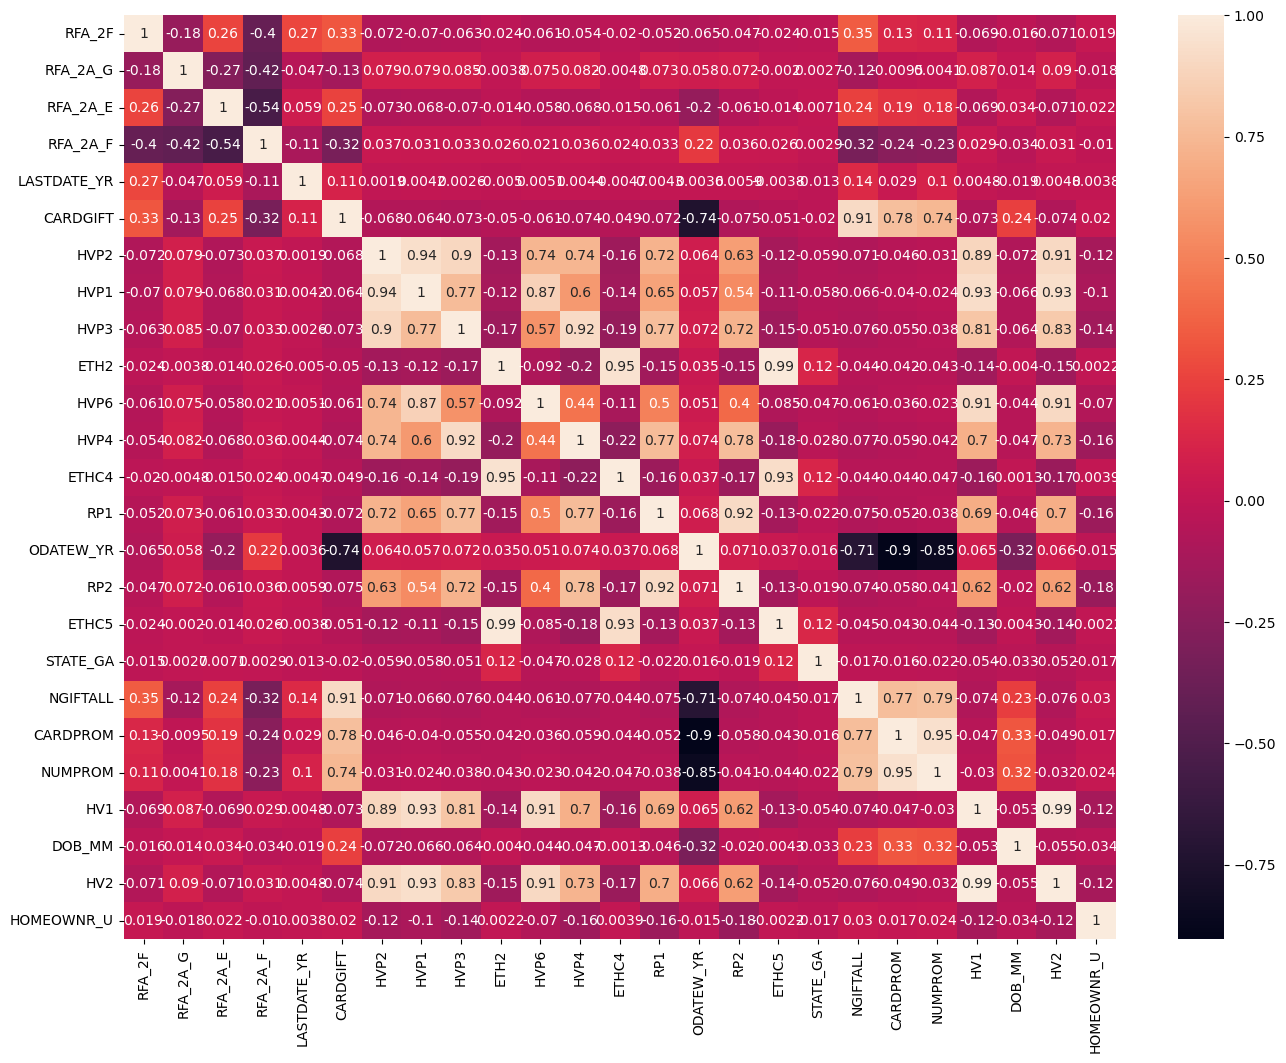

In [114]:
corr_matrix=X_train_new[cols].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

- Features HVP1, HVP2, HVP3, HVP4, HVP5, HVP6 are higly correlated. I will keep HVP3, and remove others. 
- CARDPROM and NUMPROM also have very similiar meaning after reading the dictionary. I decide to keep only CARDPROM. 

In [115]:
chosen_features

['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'RFA_2A_F',
 'LASTDATE_YR',
 'CARDGIFT',
 'HVP2',
 'HVP1',
 'HVP3',
 'ETH2',
 'HVP6',
 'HVP4',
 'ETHC4',
 'RP1',
 'ODATEW_YR',
 'RP2',
 'ETHC5',
 'STATE_GA',
 'NGIFTALL',
 'CARDPROM',
 'NUMPROM',
 'HV1',
 'DOB_MM',
 'HV2',
 'HOMEOWNR_U']

In [116]:
col_to_remove = ["HVP1", "HVP2", "HVP4", "HVP5", "HVP6", "NUMPROM"]
type(col_to_remove)

list

In [117]:
chosen_features_reduced = chosen_features

In [118]:
for i in col_to_remove:
    if i in chosen_features_reduced:
        chosen_features_reduced.remove(i)

In [119]:
chosen_features_reduced

['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'RFA_2A_F',
 'LASTDATE_YR',
 'CARDGIFT',
 'HVP3',
 'ETH2',
 'ETHC4',
 'RP1',
 'ODATEW_YR',
 'RP2',
 'ETHC5',
 'STATE_GA',
 'NGIFTALL',
 'CARDPROM',
 'HV1',
 'DOB_MM',
 'HV2',
 'HOMEOWNR_U']

In [120]:
# we choose only selected features fromt he training set
X_train_new_fs_red = X_train_new[chosen_features_reduced]
X_train_new_fs_red
# now I chose the same features from the test set
X_test_new_fs_red = X_test[chosen_features_reduced]
X_test_new_fs_red

,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,CARDGIFT,HVP3,ETH2,ETHC4,RP1,ODATEW_YR,RP2,ETHC5,STATE_GA,NGIFTALL,CARDPROM,HV1,DOB_MM,HV2,HOMEOWNR_U
0,0.000000,0.0,0.0,1.0,0.0,0.121951,0.898990,0.020202,0.023256,0.888889,0.571429,0.909091,0.010101,0.0,0.029661,0.350000,0.325500,0.636364,0.359167,0.0
1,0.000000,0.0,0.0,1.0,0.0,0.243902,0.000000,0.959596,0.488372,0.000000,0.285714,0.101010,0.585859,0.0,0.059322,0.483333,0.042333,0.363636,0.044333,0.0
2,0.000000,1.0,0.0,0.0,0.0,0.121951,0.989899,0.000000,0.000000,0.979798,0.571429,0.979798,0.000000,0.0,0.029661,0.366667,0.382000,0.181818,0.386500,0.0
3,0.333333,0.0,1.0,0.0,0.5,0.292683,0.464646,0.000000,0.000000,0.323232,0.214286,0.575758,0.000000,0.0,0.080508,0.466667,0.160167,0.090909,0.178500,0.0
4,0.000000,0.0,0.0,1.0,0.5,0.024390,0.000000,0.171717,0.093023,0.121212,0.928571,0.191919,0.131313,0.0,0.000000,0.083333,0.047167,0.000000,0.061833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.666667,0.0,1.0,0.0,0.5,0.000000,0.040404,0.000000,0.000000,0.010101,0.714286,0.111111,0.000000,0.0,0.021186,0.216667,0.084000,0.090909,0.088333,1.0
19079,0.333333,0.0,0.0,1.0,0.5,0.073171,0.101010,0.020202,0.023256,0.000000,0.500000,0.040404,0.010101,0.0,0.021186,0.333333,0.109333,0.454545,0.107333,0.0
19080,0.000000,0.0,0.0,1.0,0.0,0.000000,0.050505,0.101010,0.046512,0.000000,0.928571,0.010101,0.050505,0.0,0.000000,0.083333,0.057833,0.000000,0.070333,0.0
19081,0.000000,0.0,1.0,0.0,0.0,0.390244,0.070707,0.010101,0.000000,0.000000,0.214286,0.010101,0.010101,0.0,0.110169,0.516667,0.079000,0.090909,0.094333,1.0


### 3. Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.

In [121]:
# Model with chosen 25 features
# X_test_new_fs
# X_train_new_fs

In [122]:
clf_2 = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree (80%)
                             random_state=42)
clf_2.fit(X_train_new_fs, y_train)
print(clf_2.score(X_train_new_fs, y_train))
print(clf_2.score(X_test_new_fs, y_test))

0.6129183566481803
0.5710842110779227


In [123]:
# Results and confusion matrix for the model with 25 features
y_pred_fs = clf_2.predict(X_test_new_fs)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_fs))

TARGET_B
0           18083
1            1000
Name: count, dtype: int64

array([[10318,  7765],
       [  420,   580]], dtype=int64)

In [124]:
### Original model with all features (355)

#  ---True negative  | False Positive ----
#        10964               7119
#  ---------------------------------------
#  ---False Negative | True Positive -----
#        454                 546

# Missed donations: 454*15 = 6225 $
# Additional cost for emails: 7724*0,68 = 4841 §
# The organisations losts: 11066 $

In [125]:
# This model has actually lower score than my original model with all features.
# The predictions are pretty similiar, but:

# Missed donations: 415*15 = 6810 $
# Additional cost for emails: 7119*0,68 = 5252 §
# The organisations losts: 12062

# So actually in this case organisation is loosing even more money... my model is not better. 

#### Another model

In [126]:
# Model with chosen 20 features
# X_train_new_fs_red
# X_test_new_fs_red

In [127]:
clf_3 = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree (80%)
                             random_state=42)
clf_3.fit(X_train_new_fs_red, y_train)
print(clf_3.score(X_train_new_fs_red, y_train))
print(clf_3.score(X_test_new_fs_red, y_test))

0.6093383549926883
0.5765340879316669


In [128]:
# Results and confusion matrix for the model with 25 features
y_pred_fs_red = clf_3.predict(X_test_new_fs_red)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_fs_red))

TARGET_B
0           18083
1            1000
Name: count, dtype: int64

array([[10431,  7652],
       [  429,   571]], dtype=int64)

In [129]:
# This model has actually lower score than my original model with all features.
# The predictions are pretty similiar, but:

# The organisations losts: 11584.0

# This has not improved model. 

In [130]:
(430 * 15)+(7550 * 0.68)

11584.0

In [131]:
clf_4 = RandomForestClassifier(max_depth=7, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree (80%)
                             random_state=42)
clf_4.fit(X_train_new_fs_red, y_train)
print(clf_4.score(X_train_new_fs_red, y_train))
print(clf_4.score(X_test_new_fs_red, y_test))

0.6433242281268107
0.6058271760205418


In [132]:
# Results and confusion matrix for the model with 25 features
y_pred_fs_red = clf_4.predict(X_test_new_fs_red)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_fs_red))

TARGET_B
0           18083
1            1000
Name: count, dtype: int64

array([[11005,  7078],
       [  444,   556]], dtype=int64)

In [133]:
# The organisations losts: 11653.36.0

# This has not improved model. 

In [134]:
(464 * 15)+(6902 * 0.68)

11653.36

In [135]:
clf_5 = RandomForestClassifier(max_depth=15, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree (80%)
                             random_state=42)
clf_5.fit(X_train_new_fs_red, y_train)
print(clf_5.score(X_train_new_fs_red, y_train))
print(clf_5.score(X_test_new_fs_red, y_test))

0.9159561846425517
0.831787454802704


In [136]:
# Results and confusion matrix for the model with 25 features
y_pred_fs_red = clf_5.predict(X_test_new_fs_red)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_fs_red))

TARGET_B
0           18083
1            1000
Name: count, dtype: int64

array([[15627,  2456],
       [  754,   246]], dtype=int64)

In [137]:
#  ---True negative  | False Positive ----
#        15585               2498
#  ---------------------------------------
#  ---False Negative | True Positive -----
#        758                 242

#### Making predictions on the whole data set

In [138]:
# The best was the model clf so I will make predictions with that one. 
# First I need to create a data set to make predictions, so X (categorical and numerical)
# Then I will use this data set on already created model


In [139]:
X.shape

(95412, 337)

In [140]:
X = X.drop(["RFA_2R"], axis=1)

In [141]:
X.shape

(95412, 336)

In [142]:
numericalX    = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(object)

encoded_categorical_X = encoder.transform(categoricalX).toarray()
encoded_categorical_X_df=pd.DataFrame(encoded_categorical_X, columns=encoder.get_feature_names_out())

scaled_numerical_X = transformer.transform(numericalX)
scaled_numerical_X_df= pd.DataFrame(scaled_numerical_X, columns=numericalX.columns)

X_df = pd.concat([scaled_numerical_X_df, encoded_categorical_X_df], axis = 1)

In [143]:
X_df

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000017,0.463918,0.833333,1.000000,0.066390,0.000000,0.151515,0.555556,0.111111,0.060606,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000017,0.624862,0.333333,0.111111,0.008299,0.000000,0.202020,0.292929,0.333333,0.060606,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.711340,0.000000,0.444444,0.008299,0.000000,0.232323,0.141414,0.313131,0.030303,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.793814,0.333333,0.222222,0.248963,0.010101,0.282828,0.090909,0.535354,0.262626,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.000017,0.624862,0.666667,1.000000,0.000000,0.141414,0.363636,0.474747,0.111111,0.070707,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,0.000017,0.484536,1.000000,1.000000,0.004149,0.000000,0.313131,0.434343,0.191919,0.040404,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,0.000017,0.608247,0.666667,1.000000,0.000000,0.000000,0.181818,0.464646,0.202020,0.070707,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,0.000000,0.587629,1.000000,1.000000,0.000000,0.000000,0.282828,0.353535,0.202020,0.090909,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# Making predictions for a model

In [145]:
predictions_for_X = clf.predict(X_df)

In [146]:
predictions_for_X

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [147]:
predictions_df = pd.DataFrame(predictions_for_X)

In [148]:
predictions_df

,0
0,1
1,0
2,1
3,1
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [149]:
predictions_df = predictions_df.rename(columns={0:'TARGET_B_predicted'})

In [150]:
predictions_df

,TARGET_B_predicted
0,1
1,0
2,1
3,1
4,0
...,...
95407,0
95408,0
95409,0
95410,1


#### Exporting as CSV-file

In [151]:
predictions_df.to_csv('donors_predicted.csv', index=False)